# Imports

In [364]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import Counter
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

from random import randint

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [148]:
map_2 = ['Fake', 'True']
map_3 = ['True', 'Fake with True Text', 'Fake with False Text']
map_6 = ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']

map_6_true = ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'Imposter Cotent']

# Data Loading (#1)

In [115]:
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/images.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/labels.csv"
image_data = np.load('images.npy',allow_pickle=True)
labels = pd.read_csv('labels.csv')

images.npy.3        100%[===================>]   1.06G   160MB/s    in 7.9s    
labels.csv.3        100%[===================>]  74.51K  --.-KB/s    in 0.001s  


# Data Cleaning (#1)

In [117]:
labels = labels.drop(columns=['author', 'domain', 'subreddit', 'Unnamed: 0', 'title'])

In [118]:
labels.isnull().sum()

clean_title      56
created_utc       0
num_comments    199
score             0
upvote_ratio    199
2_way_label       0
3_way_label       0
6_way_label       0
dtype: int64

In [119]:
labels = labels.dropna()
labels

,clean_title,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,sweet spider statue in des moines ia,1.570132e+09,6.0,17,0.84,1,0,0
3,lt george h w bush is shot down by the japanese,1.527452e+09,1.0,11,0.93,0,2,2
5,life heartwarming this mother claimed her son ...,1.516299e+09,0.0,10,0.92,0,2,1
6,whistleblowers disrupt american politics,1.570210e+09,0.0,18,0.96,0,2,2
7,happy photos from the first day of gay marriag...,1.355164e+09,29.0,209,0.89,1,0,0
...,...,...,...,...,...,...,...,...
512,missing handle,1.558728e+09,1.0,17,0.88,0,2,2
514,this forest at dusk,1.527477e+09,6.0,92,0.93,0,2,2
516,mom to the rescue dog saves her puppies from d...,1.450952e+09,2.0,20,0.83,1,0,0
517,this shop sells middle finger bottles,1.535818e+09,3.0,12,0.81,1,0,0


In [120]:
labels = labels.reset_index(drop=True)
labels

,clean_title,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,sweet spider statue in des moines ia,1.570132e+09,6.0,17,0.84,1,0,0
1,lt george h w bush is shot down by the japanese,1.527452e+09,1.0,11,0.93,0,2,2
2,life heartwarming this mother claimed her son ...,1.516299e+09,0.0,10,0.92,0,2,1
3,whistleblowers disrupt american politics,1.570210e+09,0.0,18,0.96,0,2,2
4,happy photos from the first day of gay marriag...,1.355164e+09,29.0,209,0.89,1,0,0
...,...,...,...,...,...,...,...,...
317,missing handle,1.558728e+09,1.0,17,0.88,0,2,2
318,this forest at dusk,1.527477e+09,6.0,92,0.93,0,2,2
319,mom to the rescue dog saves her puppies from d...,1.450952e+09,2.0,20,0.83,1,0,0
320,this shop sells middle finger bottles,1.535818e+09,3.0,12,0.81,1,0,0


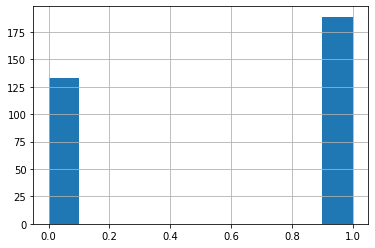

In [121]:
labels['2_way_label'].hist()

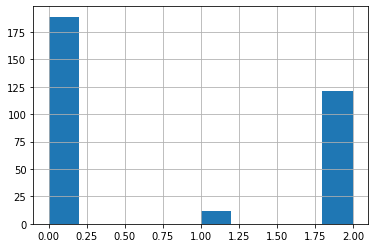

In [122]:
labels['3_way_label'].hist()

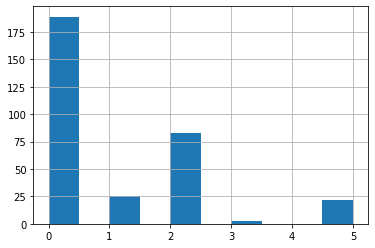

In [123]:
labels['6_way_label'].hist()

In [124]:
print('Preset Data Value Counts:\n')
print(labels['2_way_label'].value_counts(normalize=True))
print(labels['3_way_label'].value_counts(normalize=True))
print(labels['6_way_label'].value_counts(normalize=True))

Preset Data Value Counts:

1    0.586957
0    0.413043
Name: 2_way_label, dtype: float64
0    0.586957
2    0.375776
1    0.037267
Name: 3_way_label, dtype: float64
0    0.586957
2    0.257764
1    0.077640
5    0.068323
3    0.009317
Name: 6_way_label, dtype: float64


# Data Loading (#2)

In [95]:
all_train = pd.read_csv('/content/drive/MyDrive/Data Science/Fakeddit/all_train.tsv', sep='\t')

# Data Cleaning (#2)

In [96]:
all_train.shape

(878218, 20)

In [97]:
all_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')

In [98]:
all_train = all_train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'id', 'linked_submission_id', 'hasImage', 'image_url', 'author', 'subreddit', 'domain', 'title'])
full_data = all_train.dropna()

In [99]:
full_data = full_data.reset_index(drop=True)

In [100]:
full_data.shape

(634932, 8)

In [101]:
full_data.columns

Index(['clean_title', 'created_utc', 'num_comments', 'score', 'upvote_ratio',
       '2_way_label', '3_way_label', '6_way_label'],
      dtype='object')

In [102]:
full_data.head()

,clean_title,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,2.0,12,0.84,1,0,0
1,this concerned sink with a tiny hat,1.534727e+09,2.0,119,0.99,0,2,2
2,hackers leak emails from uae ambassador to us,1.496511e+09,1.0,44,0.92,1,0,0
3,this flower in my neighborhood,1.557764e+09,0.0,17,0.92,1,0,0
4,puppy taking in the view,1.471341e+09,26.0,250,0.95,1,0,0


In [108]:
print('Full Data Value Counts:\n')
print(full_data['2_way_label'].value_counts(normalize=True))
print(full_data['3_way_label'].value_counts(normalize=True))
print(full_data['6_way_label'].value_counts(normalize=True))

Full Data Value Counts:

1    0.63042
0    0.36958
Name: 2_way_label, dtype: float64
0    0.630420
2    0.343881
1    0.025699
Name: 3_way_label, dtype: float64
0    0.630420
2    0.223591
1    0.066637
5    0.041849
3    0.037503
Name: 6_way_label, dtype: float64


In [109]:
sample = full_data.sample(n=2000)

In [110]:
print('Sample Label Value Counts:\n')
print(sample['2_way_label'].value_counts(normalize=True))
print(sample['3_way_label'].value_counts(normalize=True))
print(sample['6_way_label'].value_counts(normalize=True))

Sample Label Value Counts:

1    0.6345
0    0.3655
Name: 2_way_label, dtype: float64
0    0.6345
2    0.3390
1    0.0265
Name: 3_way_label, dtype: float64
0    0.6345
2    0.2245
1    0.0570
5    0.0470
3    0.0370
Name: 6_way_label, dtype: float64


In [111]:
main_data = sample.copy()

# Features

🔴 **Select Dataset Type**

In [139]:
dataset = main_data.copy() # either main_data (2000) or labels (322)

In [140]:
dataset = dataset.reset_index(drop=True)

In [141]:
dataset.shape

(2000, 8)

In [142]:
dataset.head()

,clean_title,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,cliff jumping girl in ibiza,1.375104e+09,21.0,202,0.97,1,0,0
1,with the front fascia removed my jeep renegade...,1.571454e+09,5.0,15,0.80,1,0,0
2,i aborted my baby because it was a boy,1.421549e+09,2.0,2,0.75,1,0,0
3,a few minutes before the big bang billion year...,1.553690e+09,0.0,11,0.92,0,2,2
4,the last picture taken of hitler in colourized,1.520412e+09,11.0,1334,0.99,0,2,2


In [143]:
dataset.describe()

,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.499683e+09,17.231000,357.785500,0.851005,0.634500,0.704500,0.852000
std,6.463596e+07,126.999402,2636.984034,0.117300,0.481691,0.941607,1.318319
min,1.254837e+09,0.000000,1.000000,0.530000,0.000000,0.000000,0.000000
25%,1.455198e+09,1.000000,5.000000,0.760000,0.000000,0.000000,0.000000
50%,1.519457e+09,2.000000,12.000000,0.870000,1.000000,0.000000,0.000000
75%,1.556411e+09,7.000000,43.000000,0.950000,1.000000,2.000000,2.000000
max,1.571809e+09,4372.000000,51248.000000,1.000000,1.000000,2.000000,5.000000


In [144]:
dataset['6_way_label'] = dataset['6_way_label'].replace([5],4)

In [145]:
print('Final Dataset Value Counts:\n')
print(dataset['2_way_label'].value_counts(normalize=True))
print(dataset['3_way_label'].value_counts(normalize=True))
print(dataset['6_way_label'].value_counts(normalize=True))

Final Dataset Value Counts:

1    0.6345
0    0.3655
Name: 2_way_label, dtype: float64
0    0.6345
2    0.3390
1    0.0265
Name: 3_way_label, dtype: float64
0    0.6345
2    0.2245
1    0.0570
4    0.0470
3    0.0370
Name: 6_way_label, dtype: float64


In [146]:
title_texts = dataset['clean_title']
title_texts.head()

0                          cliff jumping girl in ibiza
1    with the front fascia removed my jeep renegade...
2               i aborted my baby because it was a boy
3    a few minutes before the big bang billion year...
4       the last picture taken of hitler in colourized
Name: clean_title, dtype: object

In [154]:
for i in range(5):
  index_val = randint(0,2000)
  print('Title:', title_texts[index_val])
  print('2 way Label: ', map_2[dataset['2_way_label'][index_val]])
  print('3 way Label: ', map_3[dataset['3_way_label'][index_val]])
  print('6 way Label: ', map_6_true[dataset['6_way_label'][index_val]])
  print('-'*50)

Title: this heart shaped potato from our garden this year
2 way Label:  True
3 way Label:  True
6 way Label:  True
--------------------------------------------------
Title: this dog catching a stick at the beach
2 way Label:  True
3 way Label:  True
6 way Label:  True
--------------------------------------------------
Title: soldier donates kidney to stranger after seeing billboard
2 way Label:  True
3 way Label:  True
6 way Label:  True
--------------------------------------------------
Title: adultery is no longer a crime in california
2 way Label:  Fake
3 way Label:  Fake with False Text
6 way Label:  Misleading Content
--------------------------------------------------
Title: italian shop was accidentally selling cocaine based tea for years
2 way Label:  True
3 way Label:  True
6 way Label:  True
--------------------------------------------------


In [156]:
def process_lang_data(text):
  '''Tokenize the text, remove stopwards, go through lemmatization, and remove punctuation'''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  for token in word_tokenize(text):
    if token not in punctuation and token not in our_stopwords:
      clipped_token = lemmatizer.lemmatize(token)
      cleaned_text.append(clipped_token)

  return cleaned_text

🔴 **Select Max_Features LANG**

In [157]:
max_nlp_features = 1000

In [158]:
bow = CountVectorizer(analyzer=process_lang_data, max_features=max_nlp_features) # 1000 to 250

bow.fit(title_texts) # fitting to our  data

bow_transformed = bow.transform(title_texts).toarray() # then transforming

In [159]:
vocab = bow.vocabulary_
vocab_data = pd.DataFrame({
    'word': vocab.keys(),
    'value': vocab.values()
})

In [160]:
bow_transformed.shape

(2000, 1000)

In [165]:
def lookup_key(item):
  maped_values = []
  for value in np.where(np.array(item) == 1)[0]:
    maped_values.append(vocab_data._get_value(vocab_data[vocab_data['value'] == value].index[0], 'word'))
  return maped_values

In [173]:
def convert_to_str(lst): 
    return ' '.join(map(str, lst))

new_vector = []
for i in bow_transformed:
  new_vector.append(convert_to_str(i))

In [188]:
vect_df = pd.DataFrame(bow_transformed, columns=list(range(1000)) )

In [189]:
vect_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Final Processed Data*

In [196]:
combined_dataset = pd.concat([vect_df, dataset.drop(columns=['clean_title'])], axis=1)

In [197]:
combined_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.375104e+09,21.0,202,0.97,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.571454e+09,5.0,15,0.80,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.421549e+09,2.0,2,0.75,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.553690e+09,0.0,11,0.92,0,2,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.520412e+09,11.0,1334,0.99,0,2,2


# Splitting Data

🔴 **Select Label Type**

In [372]:
label_type = '3_way_label' # 2_way_label, 3_way_label, or 6_way_label

In [373]:
X = combined_dataset.drop(columns=['2_way_label','3_way_label','6_way_label'])
X_train, X_test, y_train, y_test = train_test_split(X, combined_dataset[label_type], test_size=0.25, random_state=42)

print('Dimensions of training and testing data: \n')

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Dimensions of training and testing data: 

X_train: (1500, 1004)
y_train: (1500,)
X_test: (500, 1004)
y_test: (500,)


# Training Models

🔴 **Select Model**

In [374]:
selected_model = GradientBoostingClassifier()
# Logistic Regression | Support Vector Classifier | Decision Tree | Random Forest Classifier | GradientBoostingClassifier
selected_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GradientBoostingClassifier()

# Evaluating Models

In [375]:
y_pred = selected_model.predict(X_test)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.772

# Results

In [385]:
lr_results = {'2_way': 0.668, '3_way': 0.668, '6_way': 0.668}

svc_results = {'2_way': 0.668, '3_way': 0.668, '6_way': 0.668}

dt_results = {'2_way': 0.724, '3_way': 0.69, '6_way': 0.638}

rf_results = {'2_way': 0.78, '3_way': 0.76, '6_way': 0.726}

gb_results = {'2_way': 0.784, '3_way': 0.772, '6_way': 0.754}